# Python for Data Science, Level I
### *Session \#10*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Multilinear Foundations

### Warm Ups
---

**Setup**

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("seaborn")

import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("housing_prices.csv")

**Dividing data into feature matrix and target vector:**
```python
columns = ['charles_river', 'student_teacher_ratio']
X = df[columns]
y = df['median_price']
```

**Dividing data into test and train set:**
```python
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

**Create a linear model:** 
```python
model = LinearRegression()
model.fit(X_train, y_train)
```

**Predict using your linear model:** `predicted = model.predict(X_test)`

### Exercises
---

**1. In the following equation, do the features** $X_0$ **and** $X_1$ **have a positive or negative relationship with Y?**

$$Y = 200X_{0} - 65X_{1} + 25$$

In [ ]:
X_0: Positive relationship, since coeffient is 200
X_1: Negative relationship, since coeffient is -65

**2. Let's say our linear model estimates house prices by starting with \\$400\,000\, then adds \\$50,000 per room and subtracts \$2,000 per year since construction.**

**Can you translate this into an equation?**

In [ ]:
Y = 400_000 + X_0*50_000 - X_1*2000 

**3. What would a 5-room house from 1990 cost, according to this model?**

In [1]:
400_000 + (5)*50_000 - (2020-1990)*2000 

590000

**4. Create a feature matrix from the** `nitrous` **and** `avg_num_rooms` **columns. Use the** `median_price` **column as the target vector.**

**Finally, use** `train_test_split` **to separate out training vs test sets**

In [7]:
columns = ['nitrous', 'avg_num_rooms']
X = df[columns]
y = df['median_price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

**5. Create a new** `LinearRegression` **model and fit it using the data from** `X_train` **and** `y_train`
   

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**6. Use your model on** `X_test` **to create a set of** `predictions`. **What is the mean absolute error for your model?**

**Remember, use** `predictions` **and** `y_test` **when evaluating your model**

In [11]:
predictions = model.predict(X_test)

mean_absolute_error(predictions, y_test)

4048.5350570527694

## II. Multilinear Regression

### Warm Ups
---

**Correlations between columns:** `df.corr()`

**Compute R2 score:** `model.score(predictions, y_test)`

**Standardize features:** 
```python
X = scale(df[columns])
```

**Importance of features:** 
```python
sorted(zip(model.coef_, columns))
```

### Exercises
---

**1. Will the MAE (Mean Absolute Error) for this model be high or low? Will the R2 be close to 1 or 0?**

![image](flat.png)

In [13]:
# MAE will be low, since model's error is small for *most* points

# R2 score will be close to 0 however, since model does only slightly better 
# than always guessing mean value

**2. Will the MAE be high or low? Will the R2 be close to 1 or 0?**

![image](steep.png)

In [ ]:
# MAE will be low, since model's error is small for all points

# R2 score will be close to 1, since model does much better
# than always guessing mean value

**3. Use** `.corr()` **to see the column correlations, then grab out the correlations for** `median_price`

**Save the result as** `p_cor`

In [14]:
p_cor = df.corr()['median_price']

**4. Use** `plt.bar()` **to create a bar chart of the correlations.**

`plt.bar()` **needs two inputs** `p_cor.index` **and** `p_cor.values`

Hint: Add `plt.xticks(rotation=45)` to make graph more readable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

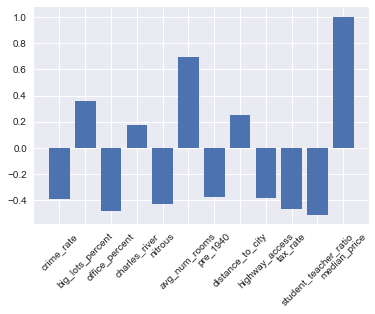

In [21]:
plt.bar(p_cor.index, p_cor.values)
plt.xticks(rotation=45)

**5. Retrain your model using all available column data, minus** `median_price` **of course!**

**Use** `scale()` **on your feature matrix before training, to standardize data**

*Hint: You can use df.columns[:-1] to grab all but the last column name*

In [26]:
columns = df.columns[:-1]
X = scale(df[columns])
y = df['median_price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**6. What is the R2 score for your new linear model?**

In [27]:
model.score(X_test, y_test)

0.6894601509051829

**7. Output the most important features. Which feature is the most positive for a house's price?** 

**What factor is the most damaging for a house's price?** 

In [28]:
sorted(zip(model.coef_, columns))

[(-2966.339077085877, 'distance_to_city'),
 (-2373.466167356416, 'nitrous'),
 (-2261.999228711691, 'tax_rate'),
 (-2178.865602601979, 'student_teacher_ratio'),
 (-1469.8941255264306, 'crime_rate'),
 (-1080.1181197786973, 'pre_1940'),
 (146.058285603444, 'office_percent'),
 (471.1509580750011, 'charles_river'),
 (839.3008468052569, 'big_lots_percent'),
 (2025.5565134883495, 'highway_access'),
 (4315.198134836053, 'avg_num_rooms')]

## III. Linear Regression Assumptions

### Warm Ups
---

**Create residuals:**
```python
predictions = model.predict(X_test)
residuals = predictions - y_test
```

In [31]:
predictions = model.predict(X_test)
residuals = predictions - y_test

**Add column names back**
```python
X_test = pd.DataFrame(X_test, columns=columns)
```

In [36]:
X_test = pd.DataFrame(X_test, columns=columns)

**Plot residual graph against predicted**
```python
plt.scatter(predictions, residuals)
```

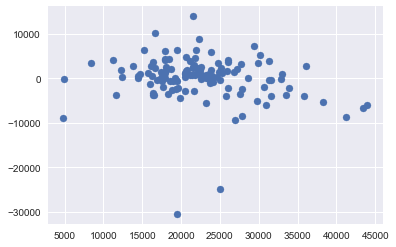

In [67]:
plt.scatter(predictions, residuals)

**Plot residual graph against predicted**
```python
plt.scatter(X_test['avg_num_rooms'], residuals)
```

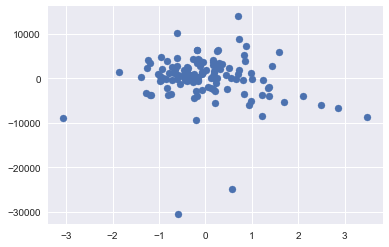

In [40]:
plt.scatter(X_test['avg_num_rooms'], residuals)

**Create a histogram of a column** 
```python
plt.hist(X_test['avg_num_rooms'])
```

(array([ 1.,  1.,  7., 27., 49., 24., 12.,  3.,  1.,  2.]),
 array([-3.0582213 , -2.40473037, -1.75123943, -1.0977485 , -0.44425757,
         0.20923337,  0.8627243 ,  1.51621524,  2.16970617,  2.82319711,
         3.47668804]),
 <a list of 10 Patch objects>)

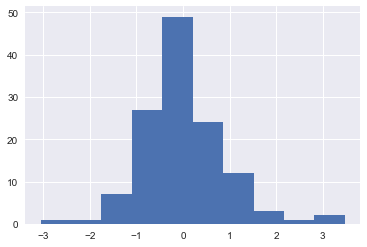

In [42]:
plt.hist(X_test['avg_num_rooms'])

### Exercises
---

**1. Create two scatter plots of** `avg_num_rooms` **and** `student_teacher_ratio` **against** `y_test`. **Which of these seems like a better indicator for price?** 

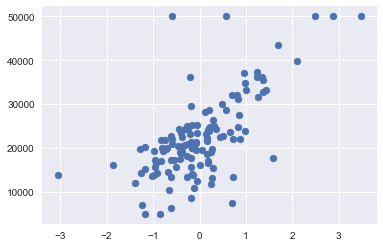

In [53]:
# avg_num_rooms has a clearer trend

plt.scatter(X_test['avg_num_rooms'], y_test)

plt.scatter(X_test['student_teacher_ratio'], y_test)

**2. Plot the residuals against the predictions.**

**Are the errors evenly distributed, or are there systematic failures?** 

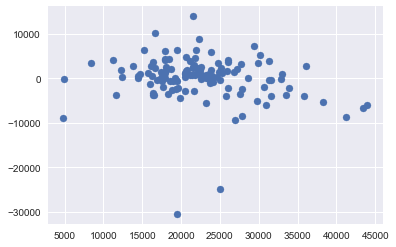

In [66]:
# Evenly distributed, with two outliers

plt.scatter(predictions, residuals)

**3. Plot the residuals against** `avg_num_rooms`. **Are the errors evenly distributed, or are there patterns of failure?**

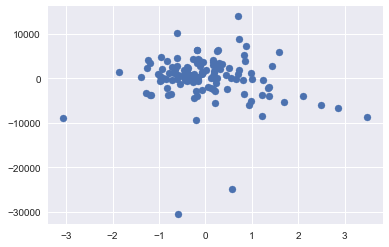

In [59]:
# Errors look evenly distributed

plt.scatter(X_test['avg_num_rooms'], residuals)

**4. Plot a histogram of the residuals. Are they (roughly) normally distributed, or are there a lot of outliers?** 

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,
         3.,  8., 14., 15., 35., 22., 14.,  6.,  1.,  2.,  0.,  1.]),
 array([-30527.4224022 , -28745.99847488, -26964.57454755, -25183.15062023,
        -23401.7266929 , -21620.30276558, -19838.87883825, -18057.45491093,
        -16276.0309836 , -14494.60705627, -12713.18312895, -10931.75920162,
         -9150.3352743 ,  -7368.91134697,  -5587.48741965,  -3806.06349232,
         -2024.63956499,   -243.21563767,   1538.20828966,   3319.63221698,
          5101.05614431,   6882.48007163,   8663.90399896,  10445.32792628,
         12226.75185361,  14008.17578094]),
 <a list of 25 Patch objects>)

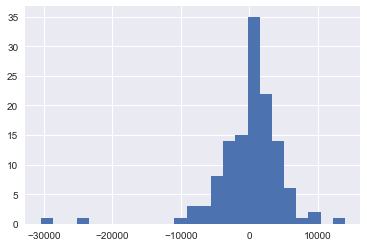

In [62]:
# Errors look roughly normally distributed

plt.hist(residuals, bins=25)